### Николаев Александр НФИбд-01-17. Лабораторная работа № 1. С/б № 1032172712

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, sem
%matplotlib inline

Считаем данные и построим распределение

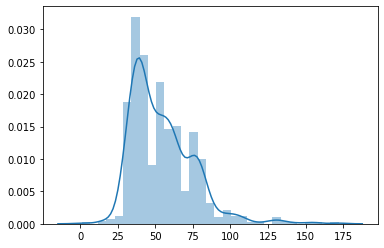

In [2]:
data = pd.read_csv('data.csv', header=None)
data = data.to_numpy().ravel()
sns.distplot(data);

Реализуем ручками функции поиска основных статистик

In [3]:
def mean(a):
    n = 0
    s = 0
    for x in a:
        s += x
        n += 1
    return s / n


def median(a):
    a = np.sort(a)
    n = a.size
    return a[n // 2] if n % 2 == 1 else (a[n // 2] + a[n // 2 - 1]) / 2


def variance(a):
    x_mean = mean(a)
    s = 0
    for x in a:
        s += (x - x_mean) ** 2
    return s / (a.size - 1)


def std(a):
    return np.sqrt(variance(a))


def quartile(a, k): # k = 1 or k = 3
    m = median(a)
    a = np.sort(a)
    if k == 1:
        a = a[:a.size // 2] if a.size % 2 == 0 else a[:a.size // 2]
    else:
        a = a[a.size // 2:] 
    return median(a)

Найдем все статистики, который просят в задании

In [4]:
m = mean(data)
med = median(data)
var = variance(data)
s = std(data)
q1 = quartile(data, 1)
q3 = quartile(data, 3)
print(f'''Среднее = {m}
Медиана = {med}
Дисперсия = {var}
Стандартное отклонение = {s}
1-й квартиль = {q1}
3-й квартиль = {q3}''')

Среднее = 54.437415881561236
Медиана = 51
Дисперсия = 432.34344991710543
Стандартное отклонение = 20.792870170255608
1-й квартиль = 39
3-й квартиль = 64.0


Проверим, что все реализованные ручками функции нашли значения такие же, как это сделали бы numpy функции

In [5]:
assert(m == np.mean(data))
assert(med == np.median(data))
assert(q1 == np.quantile(data, 0.25))
assert(q3 == np.quantile(data, 0.75))
assert(np.isclose(var, np.var(data, ddof=1)))
assert(np.isclose(s, np.std(data, ddof=1)))

Посчитаем 79.1% доверительный интервал для оценки суммы генеральной совокупности

In [6]:
N = 30463
n = data.size
confidence = 0.791
alpha = 1 - confidence
fpc = np.sqrt(1 - n / N)
left_quantile = norm.ppf(alpha / 2)
right_quantile = norm.ppf(1 - alpha / 2)
assert(np.isclose(left_quantile,-right_quantile))
sum_hat = N * m
std_sum_error = N * s * fpc / np.sqrt(n)
sum_hat_L = sum_hat + left_quantile * std_sum_error
sum_hat_R = sum_hat + right_quantile * std_sum_error
print(f'sum = {sum_hat} in: [{sum_hat_L}; {sum_hat_R}]')

sum = 1658327.0 in: [1629491.2653073838; 1687162.7346926162]


Он же, только без поправки на FPC (долю популяции)

In [7]:
interval = norm.interval(0.791, loc=np.mean(data), scale=sem(data))
interval[0] * N, interval[1] * N

(1629133.0436880416, 1687520.9563119581)

very close to our evaluation

In [37]:
pd.DataFrame(np.array([m, med, var, s, q1, q3, sum_hat_L, sum_hat_R])).to_csv('result')

In [38]:
xd = pd.read_csv('result.csv')
xd

,Unnamed: 0,0
0,0,54.437
1,1,51.000
2,2,432.343
3,3,20.793
4,4,39.000
5,5,64.000
6,6,1629491.265
7,7,1687162.735
